# Métodos de Leapfrog e Derivados

In [14]:
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt

# Método Leapfrog

In [15]:
def leapfrog(start: float, end: float, func: Callable, N: int, x0: (float | np.ndarray)) -> tuple[np.ndarray, np.ndarray]:
    """
        Resolve o sistema de K EDOs `dx/dt = func(x, t)` usando o método Leapfrog começando em `start` e terminando em `end` com `N` passos sendo `x(start) = x0`.

        A função `func` deve aceitar dois argumentos: um array `x` com K entradas e um float `t`. O argumento `x0` deve também ter K entradas.

        ### Retorno
        tt: Array com os valores da variável independente `t`
        xx: Array com os resultados em função de `t` sendo que para K > 1 cada elemento do array é um array com o valor das várias funções em `t`.
    """

    # Passo
    h = (end - start) / N
    tt = [start]
    xx = [x0]

    # Valor de x(t + h/2)
    xleap = x0 + h * func(x0, start) / 2

    xh = x0
    th = start
    for _ in range(N):
        # Valor de x(t + h)
        xh = xh + h * func(xleap, th + h/2)
        th = th + h

        # Valor de x(t + h * 3/2)
        xleap = xleap + h * func(xh, th)
        
        xx += [xh]
        tt += [th]
    
    return np.array(tt), np.array(xx)

# Método de Verlet

In [16]:
def verlet(start: float, end: float, func: Callable, N: int, x0: (float | np.ndarray), v0: (float | np.ndarray)) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
        Resolve o sistema de K EDOs `d^2x/dt^2 = func(x, t)` usando o método de Verlet começando em `start` e terminando em `end` com `N` passos sendo `x(start) = x0` e `v(start) = v0`.
        
        Esta método consiste em escrever cada EDO de segunda ordem como um par de EDOs de primeira ordem dx/dt = v e dv/dt = f(x, t).

        A função `func` deve aceitar dois argumentos: um array `x` com K entradas e um float `t`. Os argumentos `x0` e `v0` devem também ter K entradas.

        ### Retorno
        tt: Array com os valores da variável independente `t`
        xx: Array com os resultados em função de `t` sendo que para K > 1 cada elemento do array é um array com o valor das várias funções em `t`
        vv: Array com os resultados em função de `t` sendo que para K > 1 cada elemento do array é um array com o valor das várias funções em `t`
    """

    # Passo
    h = (end - start) / N
    tt = [start]
    xx = [x0]
    vv = [v0]

    # Valor de v(t + h/2)
    vleap = v0 + h * func(x0, start) / 2

    th = start  # Valor de t
    xh = x0     # Valor de x(t)
    vh = v0     # Valor de v(t)
    for _ in range(N):
        # Valor de x(t + h)
        xh = xh + h * vleap
        th = th + h

        # Valor de v(t + h) e v(t + 3/2 * h)
        k = h * func(xh, th)
        vh = vleap + k/2
        vleap = vleap + k
        
        tt += [th]
        xx += [xh]
        vv += [vh]
    
    return np.array(tt), np.array(xx), np.array(vv)

# Método do Ponto Médio Modificado

In [17]:
def pmediomod(start: float, end: float, func: Callable, N: int, x0: (float | np.ndarray)) -> tuple[np.ndarray, np.ndarray]:
    """
        Resolve o sistema de K EDOs `dx/dt = func(x, t)` usando o método do Ponto Médio Modificado começando em `start` e terminando em `end` com `N` passos sendo `x(start) = x0`.

        A função `func` deve aceitar dois argumentos: um array `x` com K entradas e um float `t`. O argumento `x0` deve também ter K entradas.

        ### Retorno
        tt: Array com os valores da variável independente `t`
        xx: Array com os resultados em função de `t` sendo que para K > 1 cada elemento do array é um array com o valor das várias funções em `t`.
    """

    # Passo
    h = (end - start) / N
    tt = [start]
    xx = [x0]

    # Valor de x(t + h/2)
    xleap = x0 + h * func(x0, start) / 2

    xh = x0
    th = start
    for step in range(N):
        # Valor de x(t + h)
        xh = xh + h * func(xleap, th + h/2)
        th = th + h

        # Calcular valor de x(end)
        if step == N-1:
            xh = (xh + xleap + (h/2) * func(xh, th)) / 2
        
        # Calcular valor de x(t + h * 3/2) e guardar
        else:
            xleap = xleap + h * func(xh, th)
        
        xx += [xh]
        tt += [th]
    
    return np.array(tt), np.array(xx)

## Testar os Métodos

Vamos verificar que os métodos funcionam, considerando a seguinte equação diferencial:

$$
\frac{dx}{dt} = -0.5x \quad\quad x(0) = 1
$$

Cuja solução exata é:

$$
x(t) = e^{-0.5t}
$$

In [18]:
# Lado direito da equação
def f(x, t):
    return -0.5 * x

# Solução exata
def exato(t):
    return np.exp(-0.5 * t)


# Parâmetro
a, b = 0, 10


tt = np.linspace(a, b, 1000)
xx = exato(tt)

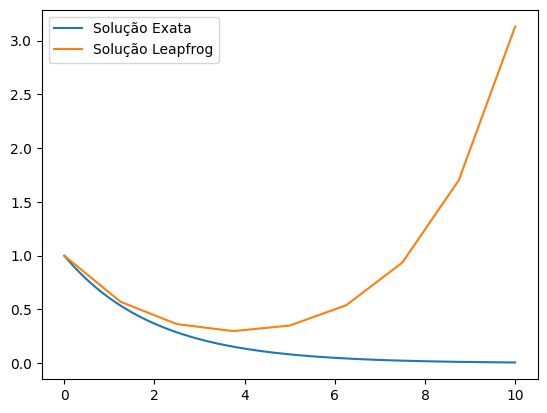

In [19]:
ttl, xxl = leapfrog(a, b, f, 8, 1)

plt.plot(tt, xx, label="Solução Exata")
plt.plot(ttl, xxl, label="Solução Leapfrog")
plt.legend()
plt.show()

# Podemos perceber a divergência se no cógido deste método também devolvermos os valores de x(t) nos pontos intermédios. Vemos que o método diverge de forma semelhante ao método de Euler!

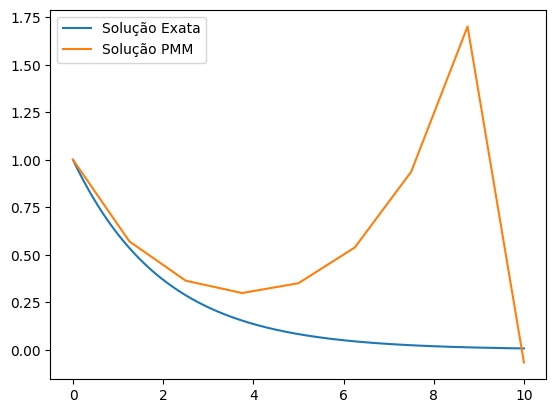

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [20]:
ttpmm, xxpmm = pmediomod(a, b, f, 8, 1)

plt.plot(tt, xx, label="Solução Exata")
plt.plot(ttpmm, xxpmm, label="Solução PMM")
plt.legend()
plt.show()

print

# Método de Verlet

Para este método vamos considerar a seguinte EDO:

$$
\begin{align*}
\frac{d^2x}{dt^2} = -\omega^2x \quad\quad x(0) = A \quad\quad v(0) = 0
\end{align*}
$$

Cuja solução é nossa conhecida:
$$
\begin{align*}
x(t) = A\cos(\omega t)
\end{align*}
$$

In [21]:
# Constantes
A = 1
OMEGA = 2

# Lado direito da equação
def f(x, t):
    global OMEGA

    return -OMEGA**2 * x

# Solução exata
def exato(t):
    global A, OMEGA
    return A * np.cos(OMEGA * t)


# Parâmetros
Tau = 2 * np.pi / OMEGA
a, b = 0, 3 * Tau


tt = np.linspace(a, b, 1000)
xx = exato(tt)

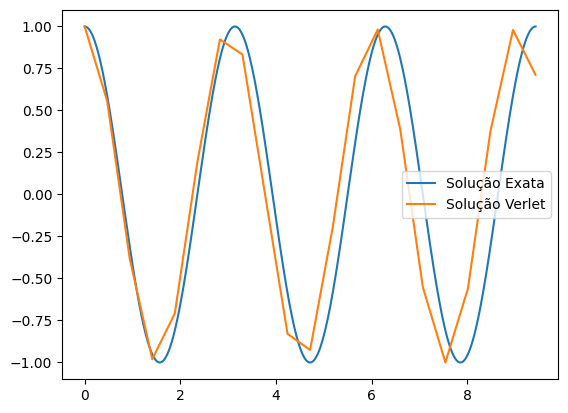

In [22]:
ttv, xxv, vvv = verlet(a, b, f, 20, A, 0)

plt.plot(tt, xx, label="Solução Exata")
plt.plot(ttv, xxv, label="Solução Verlet")
plt.legend()
plt.show()

# Testar para Sistemas de ODEs

Com base no exercício 2. da ficha 7

In [23]:
def f(r: np.ndarray, t: float) -> np.ndarray:
    alpha, beta, gamma, delta = 1, 0.5, 0.5, 2
    x, y = r[0], r[1]

    return np.array([alpha * x - beta * x * y, gamma * x * y - delta * y])

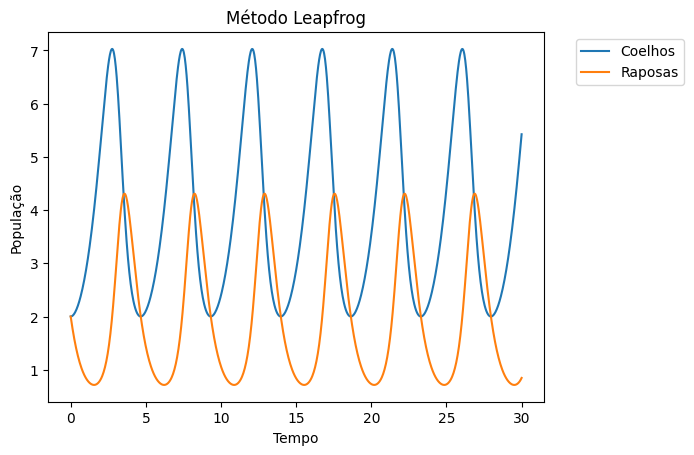

In [24]:
tt, sol = leapfrog(0, 30, f, 1000, np.array([2.0, 2.0]))
xx = np.array([item[0] for item in sol])
yy = np.array([item[1] for item in sol])

plt.title("Método Leapfrog")
plt.plot(tt, xx, label="Coelhos")
plt.plot(tt, yy, label="Raposas")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("Tempo")
plt.ylabel("População")
plt.show()

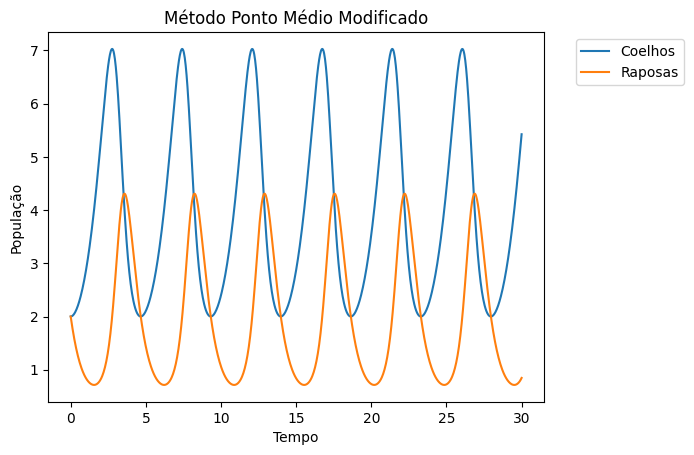

In [25]:
tt, sol = pmediomod(0, 30, f, 1000, np.array([2.0, 2.0]))
xx = np.array([item[0] for item in sol])
yy = np.array([item[1] for item in sol])

plt.title("Método Ponto Médio Modificado")
plt.plot(tt, xx, label="Coelhos")
plt.plot(tt, yy, label="Raposas")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("Tempo")
plt.ylabel("População")
plt.show()